### Team

Shiref Khaled Elhalawany -  221100944

Karim Ashraf Elsayed - 221100391

Bassant Kamal Mesilam - 221100244 

# Section 1: Statistical Analysis

### Loading Dataset

This code imports the required libraries, loads the Electronics ratings dataset into a Pandas DataFrame, assigns column names since the file has no header, and then extracts the ItemID, UserID, and Rating columns into lists for further processing.


In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../dataset/Electronics.csv'

df = pd.read_csv(file_path, header=None, names=["ItemID", "UserID", "Rating", "Timestamp"])
print("Data loaded successfully using pandas.")

items = df["ItemID"].tolist()
users = df["UserID"].tolist()
ratings = df["Rating"].astype(float).tolist()

Data loaded successfully using pandas.


### 3.1.1

This code calculates dataset statistics by counting the unique number of users, the unique number of products, and the total number of ratings.


In [3]:
unique_users = set(users)
total_users = len(unique_users)
print(f"Total number of users: {total_users}")

Total number of users: 9838676


In [4]:
unique_items = set(items)
total_products = len(unique_items)
print(f"Total number of products: {total_products}")

Total number of products: 756489


In [5]:
total_ratings = len(ratings)
print(f"Total number of ratings: {total_ratings}")

Total number of ratings: 20994353


### 3.1.2

This part finds the minimum and maximum rating values and prints whether all ratings fall within the 1–5 scale.

In [6]:
min_rating = min(ratings)
max_rating = max(ratings)
if min_rating >= 1 and max_rating <= 5:
    print("All ratings are between 1 and 5.")
else:
    print(f"Ratings are NOT all between 1 and 5. Min: {min_rating}, Max: {max_rating}")

All ratings are between 1 and 5.


### 3.1.3

This section counts how many ratings each user has submitted and stores the results in a dictionary.  

It prints a summary and saves the user–rating counts to a CSV file named:  
`3_1_3_user_counts.csv`

In [7]:
user_counts = {}
for u in users:
    if u in user_counts:
        user_counts[u] += 1
    else:
        user_counts[u] = 1

print(f"Number of ratings per user calculated for {len(user_counts)} users.")

print(f"Example user count: {list(user_counts.items())[0]}")

pd.DataFrame(user_counts.items(), columns=['User', 'Count']).to_csv('../results/3_1_3_user_counts.csv', index=False)

Number of ratings per user calculated for 9838676 users.
Example user count: ('A1N070NS9CJQ2I', 2)


### 3.1.4

This part counts how many ratings each item has received and stores the results in a dictionary.  

It prints a summary and saves the item–rating counts to a CSV file named:  
`3_1_4_item_counts.csv`

In [8]:
item_counts = {}
for i in items:
    if i in item_counts:
        item_counts[i] += 1
    else:
        item_counts[i] = 1

print(f"Number of ratings per item calculated for {len(item_counts)} items.")

print(f"Example item count: {list(item_counts.items())[0]}")

pd.DataFrame(item_counts.items(), columns=["item", "count"]).to_csv("../results/3_1_4_item_counts.csv", index=False)

Number of ratings per item calculated for 756489 items.
Example item count: ('0060009810', 17)


### 3.1.5

This section sums all ratings for each user, calculates their average rating, and stores the results in a dictionary.  

It prints a sample output and saves the averages to a CSV file named:  
`3_1_5_user_avgs.csv`

In [9]:
user_sums = {}
for u, r in zip(users, ratings):
    if u in user_sums:
        user_sums[u] += r
    else:
        user_sums[u] = r

user_avgs = {}
for u in user_counts:
    user_avgs[u] = round(user_sums[u] / user_counts[u],2)

print("Average ratings per user calculated.")
print(f"Example user avg: {list(user_avgs.items())[0]}")

pd.DataFrame(user_avgs.items(), columns=["user", "avg"]).to_csv("../results/3_1_5_user_avgs.csv", index=False)

Average ratings per user calculated.
Example user avg: ('A1N070NS9CJQ2I', 4.0)


### 3.1.6

This part calculates the sum of ratings for each item, then computes the average rating for every item.  

It prints a sample result and exports two CSV files:  
- `3_1_6_item_sums.csv` → total rating per item  
- `3_1_6_item_avgs.csv` → average rating per item

In [10]:
item_sums = {}
for i, r in zip(items, ratings):
    if i in item_sums:
        item_sums[i] += r
    else:
        item_sums[i] = r

item_avgs = {}
for i in item_counts:
    item_avgs[i] = round(item_sums[i] / item_counts[i],2)

print("Average ratings per item calculated.")
print(f"Example item avg: {list(item_avgs.items())[0]}")

pd.DataFrame(list(item_sums.items()), columns=["item", "sum"]).to_csv("../results/3_1_6_item_sums.csv", index=False)
pd.DataFrame(list(item_avgs.items()), columns=["item", "avg"]).to_csv("../results/3_1_6_item_avgs.csv", index=False)

Average ratings per item calculated.
Example item avg: ('0060009810', 4.53)


### 3.1.7

This section sorts items by the number of ratings they received and plots the distribution using a line chart to visualize item popularity.

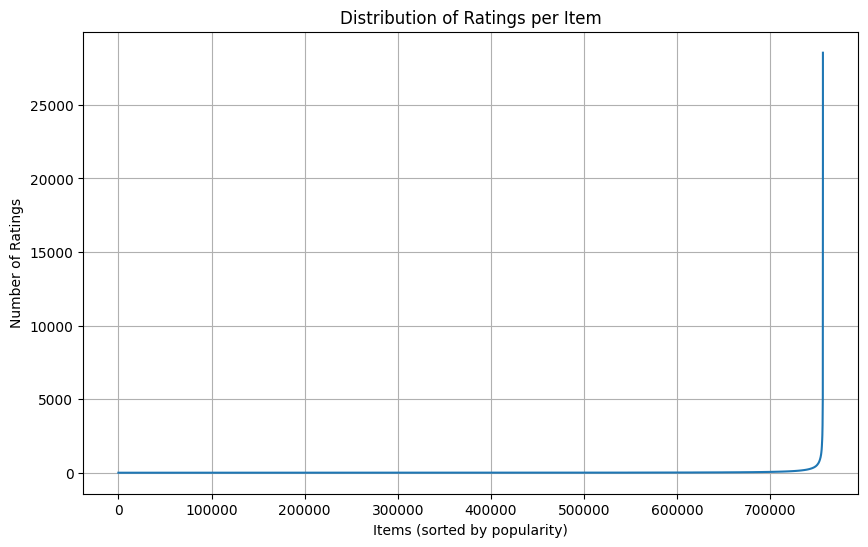

In [11]:
sorted_item_counts = sorted(item_counts.values())

plt.figure(figsize=(10, 6))
plt.plot(sorted_item_counts)
plt.xlabel('Items (sorted by popularity)')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings per Item')
plt.grid(True)
plt.show()

### 3.1.8

This section converts each item's average rating into a percentage of the maximum rating (5.0).  

It then categorizes items into ten predefined groups (G1–G10), based on rating percentage ranges, and prints the number of items in each group along with their corresponding rating ranges.

In [12]:
groups = {
    'G1': [], 'G2': [], 'G3': [], 'G4': [], 'G5': [],
    'G6': [], 'G7': [], 'G8': [], 'G9': [], 'G10': []
}

group_ranges = {
    'G1':  (0, 1),
    'G2':  (1, 5),
    'G3':  (5, 10),
    'G4':  (10, 20),
    'G5':  (20, 30),
    'G6':  (30, 40),
    'G7':  (40, 50),
    'G8':  (50, 60),
    'G9':  (60, 70),
    'G10': (70, 100)
}

for item, avg in item_avgs.items():
    percentage = (avg / 5.0) * 100
    if percentage <= 1:
        groups['G1'].append(item)
    elif percentage <= 5:
        groups['G2'].append(item)
    elif percentage <= 10:
        groups['G3'].append(item)
    elif percentage <= 20:
        groups['G4'].append(item)
    elif percentage <= 30:
        groups['G5'].append(item)
    elif percentage <= 40:
        groups['G6'].append(item)
    elif percentage <= 50:
        groups['G7'].append(item)
    elif percentage <= 60:
        groups['G8'].append(item)
    elif percentage <= 70:
        groups['G9'].append(item)
    else:
        groups['G10'].append(item)


print("Number of products per group (with percentage & rating ranges):")
for g, items_in_g in groups.items():
    low_p, high_p = group_ranges[g]

    low_r = round((low_p / 100) * 5.0, 2)
    high_r = round((high_p / 100) * 5.0, 2)

    print(f"{g}: {len(items_in_g)} items   "
          f"(Range: {low_p}% - {high_p}% | Rating Scale: {low_r} - {high_r})")

Number of products per group (with percentage & rating ranges):
G1: 0 items   (Range: 0% - 1% | Rating Scale: 0.0 - 0.05)
G2: 0 items   (Range: 1% - 5% | Rating Scale: 0.05 - 0.25)
G3: 0 items   (Range: 5% - 10% | Rating Scale: 0.25 - 0.5)
G4: 41297 items   (Range: 10% - 20% | Rating Scale: 0.5 - 1.0)
G5: 4102 items   (Range: 20% - 30% | Rating Scale: 1.0 - 1.5)
G6: 25327 items   (Range: 30% - 40% | Rating Scale: 1.5 - 2.0)
G7: 18732 items   (Range: 40% - 50% | Rating Scale: 2.0 - 2.5)
G8: 69356 items   (Range: 50% - 60% | Rating Scale: 2.5 - 3.0)
G9: 55789 items   (Range: 60% - 70% | Rating Scale: 3.0 - 3.5)
G10: 541886 items   (Range: 70% - 100% | Rating Scale: 3.5 - 5.0)


### 3.1.9

This part calculates the total number of ratings within each item group and stores the results in a dictionary.  

It then prints the totals in both unordered and sorted order to show how groups compare in popularity.

In [13]:
group_ratings = {}
for g, items_in_g in groups.items():
    total = 0
    for item in items_in_g:
        total = total + item_counts[item]
    group_ratings[g] = total

print("Total ratings per group (Unordered):")
print(group_ratings)

sorted_group_ratings = dict(sorted(group_ratings.items(), key=lambda item: item[1]))
print("\nTotal ratings per group (Ordered):")
print(sorted_group_ratings)

Total ratings per group (Unordered):
{'G1': 0, 'G2': 0, 'G3': 0, 'G4': 49074, 'G5': 14707, 'G6': 80557, 'G7': 188232, 'G8': 684070, 'G9': 1805596, 'G10': 18172117}

Total ratings per group (Ordered):
{'G1': 0, 'G2': 0, 'G3': 0, 'G5': 14707, 'G4': 49074, 'G6': 80557, 'G7': 188232, 'G8': 684070, 'G9': 1805596, 'G10': 18172117}


### 3.1.10

This section visualizes the total ratings for each item group using bar charts.  

Two plots are displayed side-by-side: one in the original G1–G10 order, and one sorted by total ratings in ascending order.

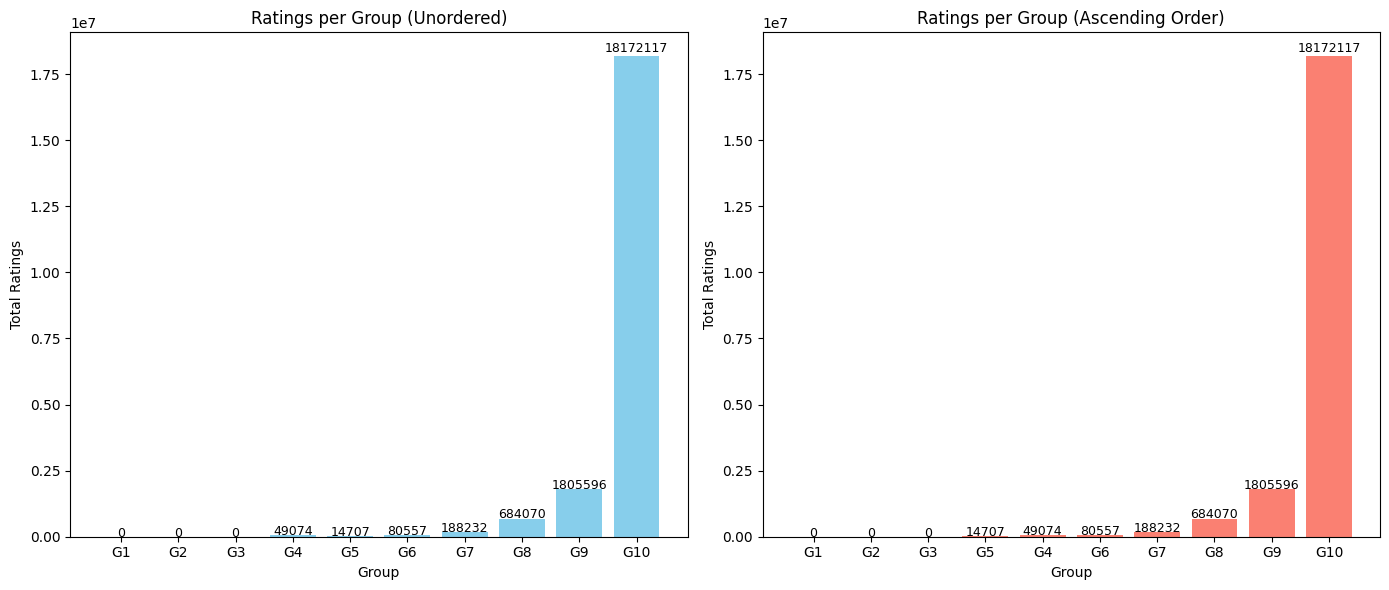

In [14]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(group_ratings.keys(), group_ratings.values(), color='skyblue')

for i, (g, val) in enumerate(group_ratings.items()):
    plt.text(i, val + (val * 0.01), str(val), ha='center', fontsize=9)

plt.title("Ratings per Group (Unordered)")
plt.xlabel("Group")
plt.ylabel("Total Ratings")

plt.subplot(1, 2, 2)
plt.bar(sorted_group_ratings.keys(), sorted_group_ratings.values(), color='salmon')

for i, (g, val) in enumerate(sorted_group_ratings.items()):
    plt.text(i, val + (val * 0.01), str(val), ha='center', fontsize=9)

plt.title("Ratings per Group (Ascending Order)")
plt.xlabel("Group")
plt.ylabel("Total Ratings")

plt.tight_layout()
plt.show()

### 3.1.11

This part selects three target users based on how many products they rated as a percentage of the total number of products.  

Each target user falls into a specific percentage range, and the selected users are saved in a CSV file named:  
`3_1_11_selected_users.csv`

In [15]:
target_users = {'U1': None, 'U2': None, 'U3': None}

for user, count in user_counts.items():
    percentage = round((count / total_products) * 100,2)
    
    if target_users['U1'] is None and percentage > 0 and percentage <= 2:
        target_users['U1'] = (user, count, percentage)
    elif target_users['U2'] is None and percentage > 2 and percentage <= 5:
        target_users['U2'] = (user, count, percentage)
    elif target_users['U3'] is None and percentage > 5 and percentage <= 10:
        target_users['U3'] = (user, count, percentage)
        
    if all(target_users.values()):
        break

print("Selected Target Users:")
for label, info in target_users.items():
    if info:
        print(f"{label}: UserID={info[0]}, Ratings={info[1]}, Percentage={info[2]:.4f}%")
    else:
        print(f"{label}: Not found")

selected_users = pd.DataFrame(target_users.values(), columns=['UserID', 'Ratings', 'Percentage'])
selected_users.to_csv('../results/3_1_11_selected_users.csv', index=False)

Selected Target Users:
U1: UserID=A1ER5AYS3FQ9O3, Ratings=45, Percentage=0.0100%
U2: Not found
U3: Not found


### 3.1.12

This section identifies two target items by sorting all items first by lowest average rating and then by highest number of ratings.  

The top two items from this sorted list are selected as `I1` and `I2`, and their ItemID, AvgRating, and NumRatings are saved to:  
`3_1_12_selected_items.csv`

In [16]:
sorted_items = sorted(
    item_avgs.keys(),
    key=lambda i: (item_avgs[i], -item_counts[i])
)

i1 = sorted_items[0]
i2 = sorted_items[1]

target_items = {
    'I1': (i1, item_avgs[i1], item_counts[i1]),
    'I2': (i2, item_avgs[i2], item_counts[i2])
}

print("Selected Target Items (Lowest AvgRating + Highest NumRatings):")
for label, (item_id, avg, cnt) in target_items.items():
    print(f"{label}: ItemID={item_id}, AvgRating={avg:.2f}, NumRatings={cnt}")

selected_items = pd.DataFrame([
    {"ItemID": target_items["I1"][0], "AvgRating": target_items["I1"][1], "NumRatings": target_items["I1"][2]},
    {"ItemID": target_items["I2"][0], "AvgRating": target_items["I2"][1], "NumRatings": target_items["I2"][2]},
])
selected_items.to_csv('../results/3_1_12_selected_items.csv', index=False)

Selected Target Items (Lowest AvgRating + Highest NumRatings):
I1: ItemID=B000JE4594, AvgRating=1.00, NumRatings=30
I2: ItemID=B00L38GD2W, AvgRating=1.00, NumRatings=13


### 3.1.13

This section builds two lookup maps:  
- `user_items`: items rated by each user  
- `item_users`: users who rated each item  

Using the selected target users, it computes how many items each target user co-rated with every other user, prints the results, and saves them to:  
`3_1_13_co_rating_users.csv`  

Using the selected target items, it computes how many users co-rated each target item with every other item, prints the results, and saves them to:  
`3_1_13_co_rating_items.csv`  

Summary statistics are printed for both target users and target items, including the number of co-raters/co-rated items, maximum common counts, and average common counts.

In [17]:
user_items = {}
for u, i in zip(users, items):
    if u not in user_items:
        user_items[u] = set()
    user_items[u].add(i)

print("User-Items map built.")

co_rating_counts = {}
target_user_ids = []

for label, info in target_users.items():
    if info is not None:
        target_user_ids.append(info[0])


for target_u in target_user_ids:
    target_set = user_items[target_u]
    co_rating_counts[target_u] = {}
    
    for other_u, other_set in user_items.items():
        if other_u == target_u:
            continue
            
        common_count = len(target_set.intersection(other_set))
        if common_count > 0:
            co_rating_counts[target_u][other_u] = common_count

rows = []
print("\nNumber of Co-Rated Items with Each Target User:")
for target_u in co_rating_counts:
    print(f"\nTarget User = {target_u}")
    for other_user, count in co_rating_counts[target_u].items():
        rows.append([target_u, other_user, count])
        print(f"  With {other_user}: {count} common items")


df_coratings = pd.DataFrame(rows, columns=["TargetUser", "OtherUser", "CommonItems"])

df_coratings.to_csv("../results/3_1_13_co_rating_users.csv", index=False)
print("\nCSV saved successfully: co_rating_users.csv")

print("Co-rating analysis complete.")
for target_u in target_user_ids:
    num_coraters = len(co_rating_counts[target_u])
    if num_coraters > 0:
        max_common = max(co_rating_counts[target_u].values())
        avg_common = int(round(sum(co_rating_counts[target_u].values()) / num_coraters))
    else:
        max_common = 0
        avg_common = 0
        
    print(f"Target User {target_u}: Co-rating with {num_coraters} users. Max common items: {max_common}, Avg common items: {avg_common:.2f}")

User-Items map built.

Number of Co-Rated Items with Each Target User:

Target User = A1ER5AYS3FQ9O3
  With AAP7PPBU72QFM: 1 common items
  With AIMPBO9K5SQ5X: 1 common items
  With A2QCVDCCZ3ABAC: 1 common items
  With A1C0Y8AFKTIRWY: 1 common items
  With A3M96C2MSACALP: 1 common items
  With A3JNMQZ0EUZVGY: 1 common items
  With A28EC1YY62SVRQ: 1 common items
  With A3DDTW92Y8VGGV: 1 common items
  With AE54CQG4THB7Y: 1 common items
  With A1O7WUHVV5HH53: 1 common items
  With AMAHN50UWYB9Y: 1 common items
  With A1DOWPEELWQ7AO: 1 common items
  With A2E168DTVGE6SV: 1 common items
  With A1ARTNPA3VALD3: 1 common items
  With A3ELN7IRFZTVIO: 1 common items
  With A24D95RTPMGY2Z: 1 common items
  With A1UWHK0U1MD7L: 1 common items
  With AKVNQ5EJQ4STG: 1 common items
  With AUPYB4D77G80K: 1 common items
  With A35VNTKN8VW4AW: 1 common items
  With A3D2FEHWHKK4GY: 1 common items
  With A192QM9Z2QKVME: 1 common items
  With ATRCOW9I4MLUX: 1 common items
  With A1Z7RN6NDG85NC: 1 common i

In [18]:
item_users = {}
for u, i in zip(users, items):
    if i not in item_users:
        item_users[i] = set()
    item_users[i].add(u)
print("Item-Users map built.")

target_item_ids = []
for label, info in target_items.items():
    if info is not None:
        target_item_ids.append(info[0])

co_rated_items = {} 
for target_i in target_item_ids:
    target_set = item_users[target_i]
    co_rated_items[target_i] = {}
    
    for other_i, other_set in item_users.items():
        if other_i == target_i:
            continue
        
        common_count = len(target_set.intersection(other_set))
        
        if common_count > 0:
            co_rated_items[target_i][other_i] = common_count

rows = []
print("\nNumber of Co-Rated Users for Each Target Item:")
for target_i in co_rated_items:
    print(f"\nTarget Item = {target_i}")
    for other_item, count in co_rated_items[target_i].items():
        rows.append([target_i, other_item, count])
        print(f"  With {other_item}: {count} common users")

df_item_coratings = pd.DataFrame(rows, columns=["TargetItem", "OtherItem", "CommonUsers"])
df_item_coratings.to_csv("../results/3_1_13_co_rating_items.csv", index=False)

print("\nCSV saved successfully: co_rating_items.csv")

print("\nItem Co-rating summary:")
for target_i in target_item_ids:
    num_co_items = len(co_rated_items[target_i])
    
    if num_co_items > 0:
        max_common = max(co_rated_items[target_i].values())
        avg_common = int(round(sum(co_rated_items[target_i].values()) / num_co_items))
    else:
        max_common = 0
        avg_common = 0
    
    print(f"Target Item {target_i}:")
    print(f"  Co-rated with {num_co_items} items")
    print(f"  Max common users: {max_common}")
    print(f"  Avg common users: {avg_common:.2f}")

Item-Users map built.

Number of Co-Rated Users for Each Target Item:

Target Item = B000JE4594
  With B00000J060: 1 common users
  With B00009MVK8: 1 common users
  With B0001656FW: 1 common users
  With B00029U0W2: 1 common users
  With B0002H7F3G: 1 common users
  With B00077AA5Q: 1 common users
  With B000EPLP3C: 1 common users
  With B000F6SR0O: 1 common users
  With B000FJD5IA: 1 common users
  With B000FNR726: 1 common users
  With B000QJGRJ8: 1 common users
  With B000WXSO76: 1 common users
  With B000ZLM9IA: 1 common users
  With B0012ANFQS: 1 common users
  With B0012JCYPC: 1 common users
  With B0015FGXZU: 1 common users
  With B002AUJHLG: 1 common users
  With B002QS0J5A: 1 common users
  With B003H10VUI: 1 common users
  With B003RH099A: 1 common users
  With B003S4ZJW4: 1 common users
  With B0043T7FXE: 1 common users
  With B004SUO1QM: 1 common users
  With B004ULPF50: 1 common users
  With B005DWHR60: 1 common users
  With B005HMKKH4: 1 common users
  With B0067I4Z4Q: 1

### 3.1.14

This section determines threshold values based on co-rating behavior:

1️⃣ For each target user, it calculates how many users co-rated at least **30% of the items rated by the target user**, storing results in `beta_per_target` and selecting the maximum as **β**.

2️⃣ It also calculates how many users co-rated at least **30% of all items in the dataset** with each target user, storing results in `beta_all_per_target` and selecting the maximum as **β_all**.

Both threshold values and detailed statistics are printed for interpretation.

In [19]:
beta_per_target = {}

print("\nThreshold analysis (30% of items per target user):")

for target_u in target_user_ids:
    num_items_target = len(user_items[target_u])
    
    min_common_items = 0.3 * num_items_target
    
    count_users_meeting_threshold = 0
    for other_u, common_count in co_rating_counts[target_u].items():
        if common_count >= int(round(min_common_items)):
            count_users_meeting_threshold += 1
    
    beta_per_target[target_u] = count_users_meeting_threshold
    
    print(f"Target User {target_u}:")
    print(f"  Items rated by target user       = {num_items_target}")
    print(f"  30% threshold (items)           = {min_common_items}")
    print(f"  Users meeting this threshold    = {count_users_meeting_threshold}")

if beta_per_target:
    beta = max(beta_per_target.values())
else:
    beta = 0

print(f"\nβ (max number of users co-rating ≥30% items with a target user) = {beta}")


Threshold analysis (30% of items per target user):
Target User A1ER5AYS3FQ9O3:
  Items rated by target user       = 44
  30% threshold (items)           = 13.2
  Users meeting this threshold    = 0

β (max number of users co-rating ≥30% items with a target user) = 0


In [20]:
beta_all_per_target = {}

print("\nThreshold analysis (30% of ALL items in the dataset):")

min_common_items_all = 0.3 * total_products
print(f"\nTotal products = {total_products}")
print(f"30% of ALL items = {min_common_items_all:.2f}")

for target_u in target_user_ids:
    count_users_meeting_threshold_all = 0
    
    if target_u in co_rating_counts:
        for other_u, common_count in co_rating_counts[target_u].items():
            if common_count >= min_common_items_all:
                count_users_meeting_threshold_all += 1
    
    beta_all_per_target[target_u] = count_users_meeting_threshold_all
    
    print(f"\nTarget User {target_u}:")
    print(f"  Users co-rating ≥ 30% of ALL items = {count_users_meeting_threshold_all}")

if beta_all_per_target:
    beta_all = max(beta_all_per_target.values())
else:
    beta_all = 0

print(f"\nβ_all (max number of users co-rating ≥30% of ALL items with a target user) = {beta_all}")
print("β_all per target user:", beta_all_per_target)


Threshold analysis (30% of ALL items in the dataset):

Total products = 756489
30% of ALL items = 226946.70

Target User A1ER5AYS3FQ9O3:
  Users co-rating ≥ 30% of ALL items = 0

β_all (max number of users co-rating ≥30% of ALL items with a target user) = 0
β_all per target user: {'A1ER5AYS3FQ9O3': 0}
